**Key Terms**

- **Filter methods:**
    A class of feature-selection methods that evaluate each feature separately and assign it a score that's used to rank the features, with scores above a certain cutoff point being retained or discarded
- **Wrapper methods:**
    A class of feature-selection methods that construct sets of features, evaluate each set in terms of their predictive power in a model, and compare the set's performance to the performance of other sets
- **Embedded methods:**
    A class of feature-selection methods that select sets of features as an intrinsic part of the fitting method for the particular type of model being used
- **Principal components analysis:**
    PCA, a complexity-reduction technique that tries to reduce a set of variables down to a smaller set of components that represent most of the information in the variables
- **Eigenvector of a linear transformation:**
    A vector that doesn't change its direction when the linear transformation is applied to it
- **Eigenvalue of an eigenvector:**
    The factor by which the eigenvector is scaled
- **Components:**
    Eigenvectors that have been divided by the square roots of their eigenvalues

In the previous lesson, you saw some techniques for transforming your variables into more useful forms, and you learned when to create new features. The ultimate goal in feature engineering is to determine the "best" set of features that you'll feed into your models. But what does that mean, and how exactly is *best* defined? The answers to these two questions are crucial to data science—but unfortunately, there is no clear-cut answer.

Rather, in data science, you're constantly trying to strike a balance between trade-offs. One such trade-off, which you'll explore in this lesson, is called the *curse of dimensionality*. Soon you'll see why there is no short answer to the two questions above.

In this lesson, you'll continue with the feature-engineering step of the iterative EDA process, as shown in this image:

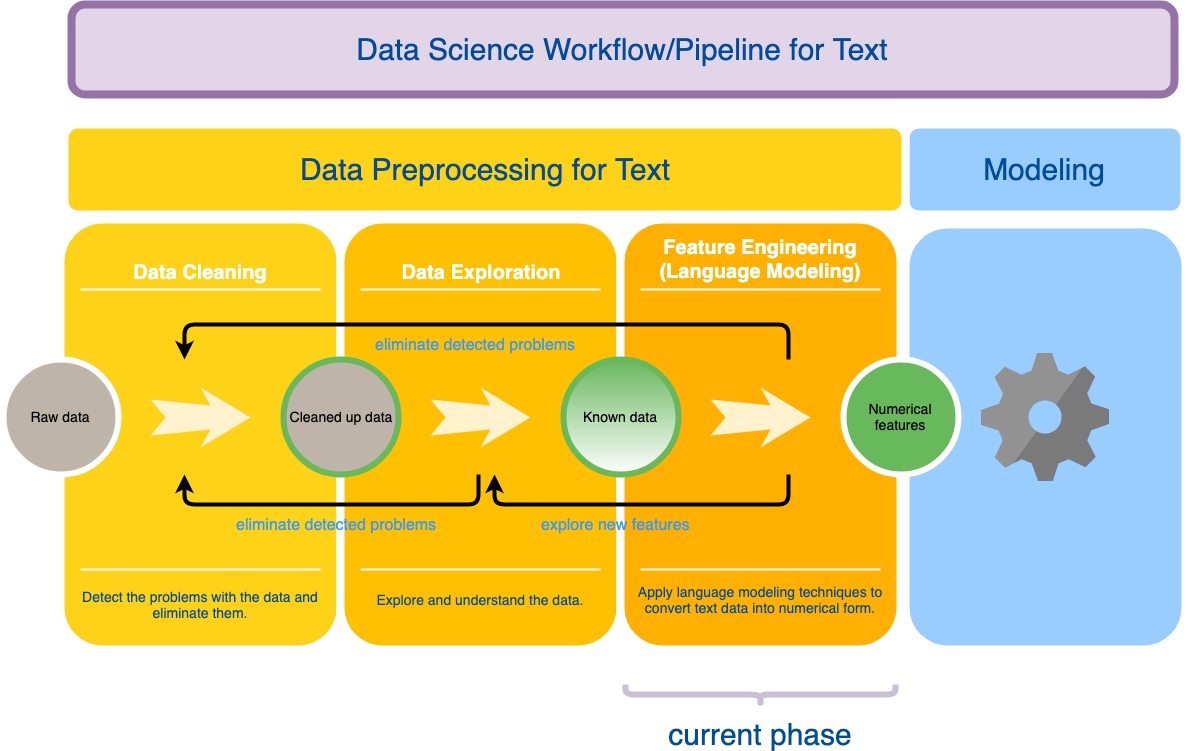
Specifically, the following topics will be covered:

* The curse of dimensionality
* How to select the features that are most useful for the modeling phase
* A popular method of dimension reduction that's useful for the feature selection

## The curse of dimensionality

Imagine that you're nearsighted and you need glasses to see distant objects. One day, you wake up but you don't remember where you put your glasses the night before. All that you can remember is that you left them on a table of some sort. Now, imagine that you search for your glasses given the different "dimensions" that this table might take:

1. Imagine that you left your glasses on a thin table. The width of the table is the same width as your glasses, and the table length is 100 times the length of your glasses. At most, you need to touch 100 areas to find your glasses on the table.

2. This time, the table surface is a square, and the length of each edge is 100 times the length of your glasses. Now, you may need to touch 100² (10,000) areas to find your glasses. You just increased the dimension of the table from 1 to 2, but the areas that you need to search (in the worst case) increased by 100 times!

3. Last, assume that the table is 3D. You can think of it like a cube or even a room full of shelves to store the glasses. If the length of each edge is 100 times the length of your glasses, then you may need to touch 100³ (1,000,000) areas! What a dramatic increase!

This example gives you a sense of what the curse of dimensionality is. Semiformally, you can define the *curse of dimensionality* as the exponential increase in the number of combinations for a linear increase in the number of dimensions. In the example, if the dimension of the table increases from 1 to 2, then the total number of glasses-sized areas that you need to search increases from 100 to 10,000. One further increase in the dimensions, from 2 to 3, results in an increase from 10,000 to 1 million in the total areas that you may need to search.

Each variable in your dataset is a dimension. So, if you run a model with 20 features, you can say that the dimension of your input is 20. And if you have 200 features, then the dimension of your input becomes 200. Now, simplify things a bit and think of running a model as finding an optimum value for each dimension. To simplify even further, imagine that you only have two distinct values that you can look at for each dimension in the optimization process. So, you need to find the best of the two values for each of the dimensions of the input. If you have 20 features, then the total number of combinations that you need to search for is 2²⁰ = 1,048,576. And if you have 200 features, then the number of combinations that you need to search for becomes 2²⁰⁰ = 1,606,938,044,258,990,275,541,962,092,341,162,602,522,202,993,782,792,835,301,376!

Ideally, you may want to include every feature that you have in your dataset with your models. But because of the curse of dimensionality, two serious problems limit you:

1. The computation time may increase exponentially with every single feature that you add to the model. So, running models with many features may become infeasible due to the time required to run.

2. To train your models, you use a sample from data. (You'll explore how this works in the next module.) However, due to the curse of dimensionality, the number of data points required to train your models increases exponentially for every feature added to the model. So, finding a large enough sample may become impossible.

Because of these two serious reasons, you should usually limit the number of features in your models. To be able to do that, you need to select the most useful features among all the variables from the dataset. Next, you'll learn about the general methods of feature selection. But before you begin, if you want to read more on the curse of dimensionality, start with this [Wikipedia article](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

## Approaches in feature selection

Feature selection is like handing out roses on *The Bachelor*. You want to keep the features that have the strongest connection to the outcome, while also prioritizing features that bring something unique to the table. But unlike *The Bachelor*, your goal isn't to narrow the options down to only one ideal "featurette." Instead, you want to settle on a set of features that is relatively straightforward to understand, is predictively powerful, minimizes overfitting, and is relatively computationally efficient. Feature selection is a balancing act between explanatory power and model parsimony. Fortunately, many feature-selection algorithms are available to help you optimize your feature sets.

Feature-selection algorithms fall into four broad groups: filter methods, wrapper methods, embedded methods, and dimensionality-reduction methods. Using techniques that you learned about earlier in this module, you can apply *filter methods*. You will also learn about a dimensionality-reduction technique later in this lesson. The other two algorithm types are integrated with the modeling phase, which you will explore in later modules when you learn about machine-learning algorithms.

### Filter methods

*Filter methods* evaluate each feature separately and assign it a score that's used to rank the features, with scores above a certain cutoff point being retained or discarded. The feature may be evaluated independently of the outcome or in combination with it. *Variance thresholds*—where only features with a variance above a certain cutoff are retained—are an example of independently evaluating features. The correlation of each feature with the outcome can also be used as a filter method; you can do this by looking at the correlation table or the Pearson correlation matrix.

Filter methods are good at selecting relevant features that are likely related to the target. They are computationally simple and straightforward, but inclined to produce lists of redundant features because interfeature relationships aren't considered. Because they're "cheap" to run, you might use filter methods as a first pass at reducing features before applying more computationally demanding algorithms like wrapper methods.

### Wrapper methods

*Wrapper methods* select sets of features. Different sets are constructed and evaluated in terms of their predictive power in a model, and their performance is compared to the performance of other sets. Wrapper methods differ in terms of how the sets of features are constructed. Two of the feature-construction methods are *forward passes* and *backward passes*. In forward passes, the algorithm begins with no features and adds features one by one, always adding the feature that results in the highest increase in predictive power and stopping at some predetermined threshold. And in backward passes, the algorithm begins with all features and drops features one by one, always dropping the feature with the least predictive power and stopping at some predetermined threshold. Forward and backward pass methods are considered "greedy" because once a feature is added (forward) or removed (backward), it's never again evaluated for the model.

Wrapper methods are good at selecting useful sets of features that effectively predict the outcome. For larger sets of features, however, wrapper methods can be computationally intensive.


### Embedded methods

*Embedded methods* also select sets of features, but do so as an intrinsic part of the fitting method for the particular type of model that you're using. This may involve *regularization*, where a *complexity penalty* is added to the fitness measures typically used to assess the predictive power of a model. Embedded methods provide the benefits of wrapper methods but are less computationally intensive. Different types of models will use different embedded methods.

### Dimensionality-reduction methods

Another common approach in feature selection is to use dimensionality-reduction techniques. These methods are especially useful when you have a lot of features, and applying the techniques mentioned above might be very computationally expensive. There are several dimension-reduction techniques, and one is so popular that every data scientist should know it. It's called *principal components analysis*, and you'll learn about it next.

## Principal components analysis

*Principal components analysis* (PCA) is a complexity-reduction technique that tries to reduce a set of variables down to a smaller set of components that represent most of the information in the variables.  At a conceptual level, PCA works by identifying sets of variables that share variance and then creating a component to represent that variance. For example, the two images below represent two different ways of sharing variance across three variables. In each, overlapping areas represent shared variance.  

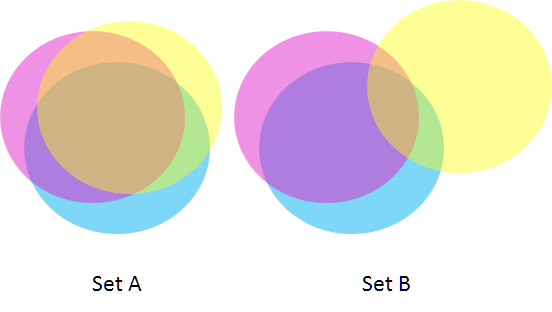

A PCA of set A would probably result in one component representing the variance shared by all three, thereby discarding the rest of the information in the circles. A PCA of set B, on the other hand, would probably result in two components, one representing the overlapping area shared by magenta and cyan, and one representing the variance in yellow not already included in the magenta-cyan component. In both cases, some variance is lost.

Losing variance in exchange for a smaller set of features can be worthwhile. Some model types (such as regression) assume that features will be uncorrelated with each other, and high levels of interfeature correlation create unstable solutions. Solutions with fewer features are easier to understand and are more computationally efficient. Solutions with fewer features are also less vulnerable to overfitting.


### Things get messy

PCA works best for normally distributed data, and it assumes that the relationships among variables are linear. PCA also works best when the variables involved range from weak to moderately strong correlations; correlations of 0, or correlations greater than 0.7 or 0.8, create problems. Correlations near 0 mean that there is no shared information. And correlations that are too high can result in components that are unstable and, therefore, change a lot in response to very small changes in the data or components made up of variance from only one or two variables. A few very high or very low correlations are fine. But when you have a variable with mostly very high or very low correlations with other variables, problems can occur.

### PCA: Rotation in space

Picture a dataset of $n$ variables as a space with $n$ dimensions. This is a generalization of a 2D scatter plot, which represents two variables in a 2D space. In PCA, the variables are first standardized to have a mean of 0 and standard deviation of 1. This is important because it means that all variables go through the origin point (where the value of all axes is 0) and share the same variance. Next, the axes of the n-dimensional space are rotated to minimize the distance between the data points and the axes.  

During rotation, some axes become shorter, indicating that variance along that axis is small and the axis contains little information. That axis, and the principal component that it represents, can be dropped without much loss of information.

You'll explore PCA using the [FIFA 19 player dataset](https://www.kaggle.com/karangadiya/fifa19) from Kaggle. This dataset includes several features for players in the popular video game FIFA 19. In the examples, you'll use 34 correlated attributes of the players, like `Crossing`, `Finishing`, and `Dribbling`. As the correlation table below suggests, some features are highly correlated with each other.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine, text
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'fifa19'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# fifa_df = pd.read_sql_query('select * from fifa19',con=engine)
with engine.begin() as conn:
    query = text("""SELECT * FROM fifa19""")
    fifa_df = pd.read_sql_query(query, conn)

# No need for an open connection,
# because you're only doing a single query
engine.dispose()

fifa_df = fifa_df.iloc[:,53:87]
fifa_df.corr()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Crossing,1.000000,0.655300,0.469507,0.809660,0.690339,0.856647,0.833105,0.761107,0.756527,0.840916,...,0.645805,0.575446,0.443101,0.428963,0.409961,-0.663053,-0.660193,-0.659767,-0.660160,-0.662539
Finishing,0.655300,1.000000,0.473427,0.661830,0.882675,0.824337,0.759229,0.697550,0.512806,0.788376,...,0.837827,0.533414,0.024218,-0.033023,-0.071811,-0.588752,-0.587145,-0.583268,-0.584852,-0.586913
HeadingAccuracy,0.469507,0.473427,1.000000,0.640091,0.505639,0.550750,0.440846,0.407772,0.510779,0.658175,...,0.551978,0.507208,0.583123,0.561063,0.533643,-0.750417,-0.749888,-0.746444,-0.744443,-0.748895
ShortPassing,0.809660,0.661830,0.640091,1.000000,0.698309,0.843722,0.775398,0.736659,0.895722,0.911451,...,0.676063,0.685137,0.559576,0.541131,0.508644,-0.729785,-0.728024,-0.724381,-0.723782,-0.728721
Volleys,0.690339,0.882675,0.505639,0.698309,1.000000,0.809639,0.807285,0.749637,0.571050,0.794935,...,0.829257,0.595281,0.120919,0.072788,0.035457,-0.590808,-0.588668,-0.584954,-0.586131,-0.588670
Dribbling,0.856647,0.824337,0.550750,0.843722,0.809639,1.000000,0.842652,0.753600,0.722465,0.938942,...,0.769594,0.597498,0.336072,0.301251,0.273963,-0.754625,-0.753181,-0.749816,-0.751348,-0.754341
Curve,0.833105,0.759229,0.440846,0.775398,0.807285,0.842652,1.000000,0.861277,0.710807,0.829568,...,0.751833,0.616532,0.289529,0.261481,0.232869,-0.606286,-0.603141,-0.600266,-0.603540,-0.604960
FKAccuracy,0.761107,0.697550,0.407772,0.736659,0.749637,0.753600,0.861277,1.000000,0.703544,0.759548,...,0.734440,0.585120,0.297976,0.279153,0.247903,-0.556605,-0.553644,-0.549911,-0.552641,-0.554920
LongPassing,0.756527,0.512806,0.510779,0.895722,0.571050,0.722465,0.710807,0.703544,1.000000,0.788650,...,0.542247,0.645797,0.587106,0.587430,0.562230,-0.596820,-0.594999,-0.591453,-0.591561,-0.595887
BallControl,0.840916,0.788376,0.658175,0.911451,0.794935,0.938942,0.829568,0.759548,0.788650,1.000000,...,0.769791,0.674881,0.452705,0.417566,0.384802,-0.788444,-0.786797,-0.783423,-0.783607,-0.787939


Now, explore the role of rotation in PCA in a 2D space, using only the `Crossing` and `Finishing` variables:

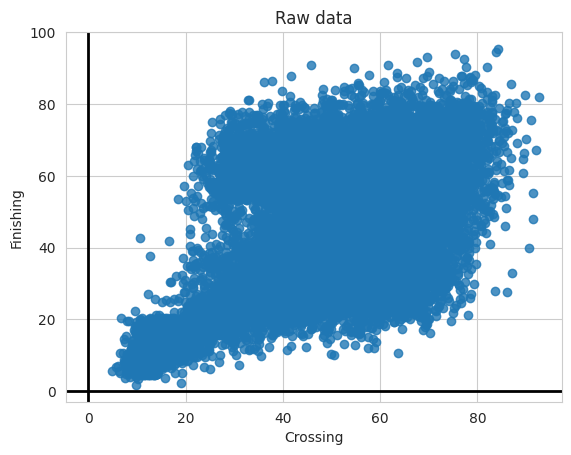

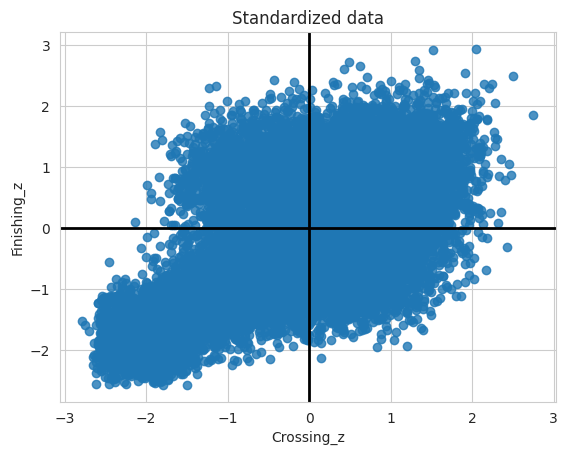

In [6]:
t = sns.regplot(
    x='Crossing',
    y='Finishing',
    data=fifa_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardize the variables by subtracting the mean and dividing by the standard
# deviation, so that both variables are on the same scale.
fifa_st_df = pd.DataFrame()
fifa_st_df['Crossing_z'] = (fifa_df['Crossing'] - fifa_df['Crossing'].mean()) / fifa_df['Crossing'].std()
fifa_st_df['Finishing_z'] = (fifa_df['Finishing'] - fifa_df['Finishing'].mean()) / fifa_df['Finishing'].std()

t = sns.regplot(
    x='Crossing_z',
    y='Finishing_z',
    data=fifa_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()



In the plot above, both axes describe equal variance—they both run from about `-3` to `3`. If you were to drop one of the axes and describe the data using only the information from the other axis, you would lose roughly 50% of the information.

However, imagine what would happen if you fit a line through the origin, minimizing the distance between the line and each point, and then rotate the data. Your axes and their information value would change, as shown below:

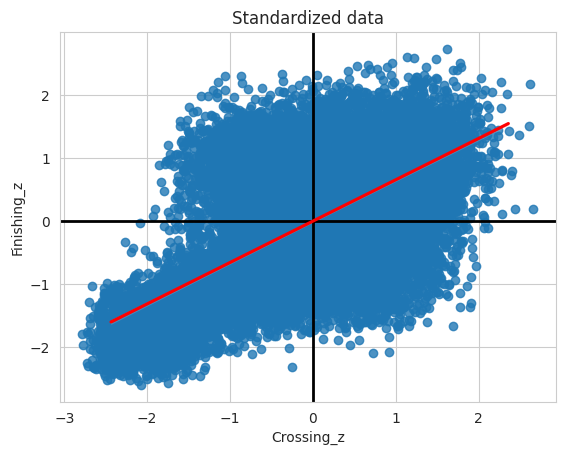

In [8]:
t = sns.regplot(
    x='Crossing_z',
    y='Finishing_z',
    data=fifa_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')

sns.regplot(x='Crossing_z',
            y='Finishing_z',
            data=fifa_st_df,
            scatter=False,
            color="red")

plt.show()

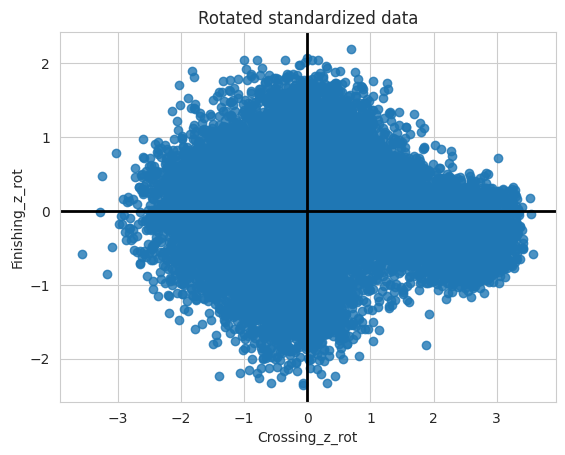

In [9]:
# Rotating the data so that the axes roughly match to the vector above
fifa_st_df['Crossing_z_rot'] = math.cos(40) * fifa_st_df['Crossing_z'] - math.sin(40) * fifa_st_df['Finishing_z']
fifa_st_df['Finishing_z_rot'] = math.sin(40) * fifa_st_df['Crossing_z'] + math.cos(40) * fifa_st_df['Finishing_z']

t = sns.regplot(
    x='Crossing_z_rot',
    y='Finishing_z_rot',
    data=fifa_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()


In the image above, the horizontal vector is longer than the vertical vector, spanning from `-4` to `4` rather than `-3` to `3`. The horizontal axis therefore contains more variance and has a higher information value than the vertical vector. If you treated the axes as principal components and discarded the vertical vector, each data point would be described solely by its position on the horizontal axis. The information on each data point's vertical position would be lost. Because of the rotation, if you drop the vertical axis now, you would lose *less* than 50% of the information.

A significant part of doing PCA is deciding whether the gain from dropping a component from the feature pool is worth the loss of information.

### The math behind PCA
The rotation pictured above is based on calculating the covariance matrix of the data and applying a linear transformation (rotation) and deriving from that the eigenvalues and eigenvectors that express the amount of variance in the data explained by the new axes. To explore this further, delve into some linear algebra.

#### Covariance matrix
Covariance matrices contain information about the amount of variance shared between pairs of variables. Earlier in this program, you learned about one type of covariance matrix: the correlation matrix. In correlation matrices, the covariances have been divided by the variances. This standardizes the covariances so that they are all on the same scale (`-1` to `1`). As a result, they can be compared.

The variance of $x$ is the sum of the squared differences between each value in $x$ ($x_i$) and the mean of $x$ ($\bar{x}$), divided by the sample size (*n*):

$$var(x)=\frac{\sum(x_i-\bar{x})^2}n$$

(Note that the standard deviation is $\sqrt{var(x)}$.)

The covariance between two variables $x$ and $y$ is the product of the differences of each variable's value and mean, divided by the sample size:

$$cov(A)=\sum\frac{(x_i-\bar{x})(y_i-\bar{y})}n$$

Here is the covariance matrix for the FIFA 19 data:

In [10]:
fifa_df = fifa_df.dropna()
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(fifa_df)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns. So transpose `X`.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00005507  0.65533573  0.46953243 ... -0.65980319 -0.6601961
  -0.66257575]
 [ 0.65533573  1.00005507  0.4734528  ... -0.58330031 -0.5848846
  -0.5869451 ]
 [ 0.46953243  0.4734528   1.00005507 ... -0.74648538 -0.74448373
  -0.74893673]
 ...
 [-0.65980319 -0.58330031 -0.74648538 ...  1.00005507  0.96438954
   0.96639022]
 [-0.6601961  -0.5848846  -0.74448373 ...  0.96438954  1.00005507
   0.97018302]
 [-0.66257575 -0.5869451  -0.74893673 ...  0.96639022  0.97018302
   1.00005507]]


#### Data as a matrix

PCA deals with many variables at once, and it represents those variables in formulas as a matrix with $m$ rows and $n$ columns. In this matrix, each row represents a measurement instance (say, data from one participant over many variables), and each column represents a variable. By mathematical convention, matrices are referred to in capital letters. For example, a dataset with three variables and four participants would be expressed as a 4 x 3 matrix $X$, shown below. (Notice that the rows come first, then the columns—just like when slicing a DataFrame, list, or string in Python.)

$$\mathbf{X} = \left[\begin{array}
{rrr}
1 & 2 & 3 \\
2 & 3 & 6 \\
2 & 1 & 9 \\
4 & 5 & 1
\end{array}\right]
$$

Matrices behave differently than individual variables in many ways. For example, it's important to know that multiplying two matrices together isn't at all like multiplying two numbers! If you aren't familiar with matrix multiplication, take a moment to read [this brief primer](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

Because of the way that matrix multiplication works, you can express the covariance matrix for $X$ as the product of $X$ and $X^T$ (the transpose of $X$). A matrix is transposed by flipping it on its diagonal so that the row and column indices are switched. Here is the transpose of the $X$ matrix above:

$$\mathbf{X^T} = \left[\begin{array}
{rrr}
1 & 2 & 2 & 4\\
2 & 3 & 1 & 5\\
3 & 6& 9 & 1
\end{array}\right]
$$

The covariance matrix for $X$, by the logic of matrix multiplication, is therefore an $m$ by $m$ matrix where the diagonal terms represent the variance of each variable, and the off-diagonals are the covariances. Represent the covariance matrix of $X$ as $C_X$:

$$\mathbf{C_X}=\frac1{n-1}XX^T$$

Now, look back at the covariance matrix for the FIFA 19 data. It was created by multiplying a matrix of data with dimensions 18159 x 34 (18159 rows and 34 variables) by the transpose of that matrix, with dimensions 34 x 18159. But because you were interested in the covariance between the variables, you multiplied $X^T$ by $X$. The covariance matrix, as a result, has dimensions 34 x 34.

### Back to PCA

In PCA, the goal is to transform the covariance matrix so that all information is in the diagonals (variances), and none is in the off-diagonals (covariances). You can do this by finding a matrix $P$, where when you multiply $P$ and $X$, you get a matrix $Y$ with a covariance matrix $C_Y$ with only `0` values on the off-diagonals.  

Start with the formula for the covariance of $Y$:

$$\mathbf{C_Y}=\frac1{n-1}YY^T$$

Substitute $Y=PX$:
$$\mathbf{C_Y}=\frac1{n-1}(PX)(PX)^T$$
$$\mathbf{C_Y}=\frac1{n-1}PXX^TP^T$$

And finally, break it down into something familiar. Remember that $C_X=XX^T$:
$$\mathbf{C_Y}=\frac1{n-1}P(XX^T)P^T$$

Here, $P$ is a matrix where each row is an eigenvector of $XX^T$. Next, focus on *eigens*.

### Eigenvectors

An *eigenvector* is the directional aspect of a component. In the graph of standardized data shown above, the eigenvector is represented by the red line. During PCA, the eigenvectors are chosen to be *orthogonal*, meaning that they have a correlation of 0 with each other. This selection process is done sequentially. First, a vector is found that minimizes the distance between the vector and the data points. This vector is the first component. Next, a second vector is found that also minimizes the distance between it and the data points, the catch being this second vector must be perpendicular to the first vector in one of the $n$ dimensions of the space. This procedure continues until there are $n$ vectors.

### Eigenvalues

*Eigenvalues* represent the length of the eigenvectors. Each eigenvector has an eigenvalue. The length of the eigenvector encodes the proportion of total variance explained by a component. The total variance is equal to the number of variables in the PCA. Thus, an eigenvalue of 1 means that the component explains the same amount of variance as one variable. An eigenvalue greater than 1 is desirable, because a component with an eigenvalue of 1 adds no value beyond the information contained in any individual variable. An eigenvalue of less than 1 is actually less efficient at conveying information than a variable by itself. An eigenvalue of 2 means that the component contains an amount of information equal to that of two variables. It does *not* mean that only two variables load on that component.

The proportion of the variance that each eigenvector represents can be calculated by dividing the eigenvalue corresponding to that eigenvector by the sum of all eigenvalues.

Below are the eigenvectors, eigenvalues, and variance explained for the FIFA 19 data:

In [11]:
# Calculating eigenvalues and eigenvectors
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The proportion of total variance in the dataset explained by each',
    'component calculated by hand\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[ 0.20031595  0.17960135  0.16494839  0.21087143  0.18542573  0.21397064
  0.19617801  0.18312402  0.186724    0.22044379  0.16424625  0.1624329
  0.16678123  0.09792308  0.14590308  0.19692239  0.06061726  0.18570425
  0.02849067  0.19595275  0.14657334  0.11695874  0.20068377  0.16230508
  0.18109287  0.15539206  0.12426471  0.11747611  0.11021307 -0.19648369
 -0.19617625 -0.1953696  -0.1954223  -0.19629495]
Eigenvalue 1: 18.849144201671322
----------------------------------------
Eigenvector 2: 
[-0.04188421 -0.22162393  0.17520018  0.03223146 -0.17866954 -0.10445267
 -0.12066113 -0.09891488  0.06745204 -0.03766039 -0.1279576  -0.10640897
 -0.1632028   0.01563515 -0.13947955 -0.08463877  0.11637021  0.10149888
  0.23049983 -0.14678066  0.25950774  0.34905342 -0.1528266  -0.15114339
 -0.14906097  0.00878257  0.33567009  0.35914161  0.36205102 -0.0824759
 -0.08304541 -0.08346555 -0.08147188 -0.08256632]
Eigenvalue 2: 4.910824565403959
----------------------------------

### Components
*Components* are eigenvectors that have been divided by the square roots of the eigenvalues. This standardizes the components so that the amount of variance in each variable explained by a component can be compared across components. You're focusing on data reduction, so for your purposes, components will replace the factored variables. This works because all the components of a given solution, together, represent all the shared variance of the variables. The benefit of PCA is that there will be fewer components than variables, thus simplifying the data space and mitigating the curse of dimensionality. After PCA, you can use the components in any analysis exactly as you would use variables.

You can use the eigenvectors and covariance matrix from FIFA 19 to calculate the components. But first, you have a decision to make.

### How many components?
The biggest decision to make when running a PCA is how many components to keep. PCA will actually give you back as many components as there are variables in the correlation matrix. If you have $n$ variables and choose to keep $n$ components, you will be able to reproduce 100% of the information in the original data. In that case, you won't have simplified your situation at all–you'll still be dealing with the same number of separate pieces of information, just expressed as components instead of as variables.

There are a number of rules to guide you in choosing the number of components to keep. The most straightforward is to keep components with eigenvalues greater than 1, because they add value (because they contain more information than a single variable). This rule tends to keep more components than is ideal.

Another rule is to visualize the eigenvalues in order from highest to lowest, connecting them with a line. This is called a *scree plot*, because it supposedly resembles the loose rock (scree) that accumulates at the foot of a mountain. You can visually inspect the plot and keep all the components whose eigenvalue falls above the point where the slope of the line changes the most drastically. This point is also called the *elbow*.

Many other rules also exist, including variance cutoffs where you only keep components that explain at least a certain percentage of the variance in the data, and programmatic ones involving simulating the PCA solution on equivalent randomized data. Ultimately, the choice of how many components to keep comes down to your reasons for doing PCA.

In the example below, see how many components you should keep in the FIFA 19 data:

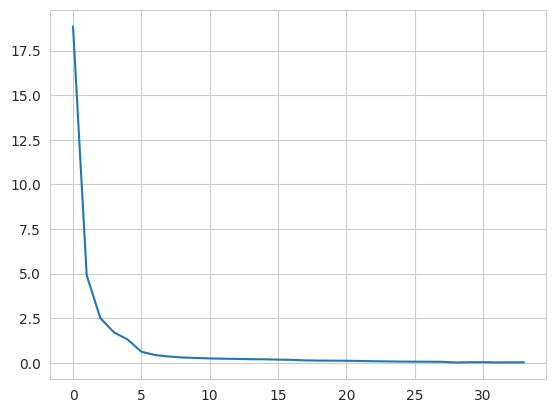

[18.8491442   4.91082457  2.51121968  1.70665278  1.30927179  0.62753979
  0.43931226  0.35950551  0.30147802  0.27677676  0.24896514  0.23252326
  0.22333056  0.20544558  0.20035624  0.18330501  0.17019445  0.13863386
  0.12832669  0.1245334   0.11821725  0.1076127   0.09255947  0.0833471
  0.07218427  0.06826828  0.06511574  0.0613974   0.02293761  0.03729554
  0.03753585  0.02663417  0.03038518  0.03104236]


In [12]:
# Print scree plot
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

Both the scree plot and the eigenvalues-greater-than-1 rule agree that you should keep only the first five components. Now it's time to create $P$, transform $X$ into $Y$, and look at how well your new component correlates with your old variables.

Ultimately, you have a solution that encompasses over 86% of the data's variance in just five components, rather than 34 variables.

Although you stepped through PCA by hand for learning purposes, there are PCA functions in both Matplotlib and scikit-learn that will do it all for you:

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.55435606 0.14442806 0.07385533 0.05019291 0.03850587]


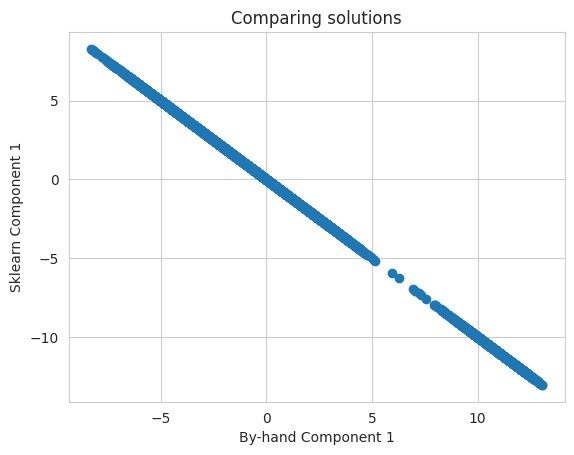

In [13]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform `X` into `Y`.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the scikit-learn solution to yours—it's a perfect match!
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

There are other ways to calculate PCA besides the covariance-based approach presented here. *Singular value decomposition* is one example of this. For a deep dive into the mathematics of PCA, check out [A Tutorial on Principal Component Analysis](https://www.ics.forth.gr/mobile/pca.pdf) by Jonathon Shlens at the Salk Institute.

### PCA summary

PCA is a series of linear transformations applied to a DataFrame to yield a smaller number of columns that explain a large proportion of the total variance contained in a DataFrame. PCA works by first transforming the data $X$ into a covariance matrix $C_X$. Then a set of eigenvectors $P$ is calculated that, when combined with $C_X$ through multiplication ($PC_XP^T$), creates a new covariance matrix $C_Y$ with `0` values on the off-diagonal elements. You then take $P$, choose the eigenvectors corresponding to the most variance explained ($P_{var}$), and use it to transform the original data $X$ (via $P_{var}X$) into $Y$. $Y$ is a new simplified dataset with as many columns as eigenvectors in $P_{var}$.